# CONTENTS
## 1.)Trail Stores Metrics
## 2.)Control Stores Metrics
## 3.)Selecting and Ranking Control Store for Each Trail Store
## 4.)Insights,Recommendations and Comparisions from Graph

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('S:/Intern/4.Quantitum/data.csv')
qvi_data = pd.read_csv('S:/Intern/4.Quantitum/QVI_data.csv')

In [2]:
qvi_data.index = pd.to_datetime(qvi_data['DATE'])

## METRICS
#### 1.)monthly overall sales revenue :   Average Monthly Sales for Store
#### 2.)monthly number of customers :  Monthly number of customers(not distinct) /Transactions
#### 3.)monthly number of transactions per customer : number of transactions per customer for store
#### 4.)nbr_unique_cust :    Monthly number of distinct Customers


### 1.)Extracting Trail Stores Data

In [3]:
def get_metrics(df):                                       #function to calculate metrics from a data

    metrics = pd.DataFrame()

    #1.)monthly overall sales revenue,
    metrics['sales_monthly']= df.groupby(['STORE_NBR'])['TOT_SALES'].resample('M').sum()

    #2.)monthly number of customers, 
    metrics['no._custs_per_mnth'] = df.groupby(['STORE_NBR'])['TXN_ID'].resample('M').count()
    metrics['mntly_uniq_nbr_custs'] = df.groupby(['STORE_NBR'])['LYLTY_CARD_NBR'].resample('M').nunique()

    #3.)monthly number of transactions per customer.
    metrics['nbr_txns'] = df.groupby(['STORE_NBR'])['TXN_ID'].resample('M').count()
    metrics['nbr_unique_cust'] = df.groupby(['STORE_NBR'])['LYLTY_CARD_NBR'].resample('M').nunique()
    metrics['txns_per_cust'] = metrics['nbr_txns']/metrics['nbr_unique_cust']
    metrics.reset_index('STORE_NBR',inplace = True)
    
    return metrics

In [4]:
trail_metrics = get_metrics(qvi_data[qvi_data['STORE_NBR'].isin([77,86,88])])

In [5]:
trail_metrics.head()

,STORE_NBR,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
DATE,,,,,,,
2018-07-31,77,296.8,55,51,55,51,1.078431
2018-08-31,77,255.5,48,47,48,47,1.021277
2018-09-30,77,225.2,44,42,44,42,1.047619
2018-10-31,77,204.5,38,37,38,37,1.027027
2018-11-30,77,245.3,44,41,44,41,1.073171


In [6]:
trail_metrics.head()

,STORE_NBR,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
DATE,,,,,,,
2018-07-31,77,296.8,55,51,55,51,1.078431
2018-08-31,77,255.5,48,47,48,47,1.021277
2018-09-30,77,225.2,44,42,44,42,1.047619
2018-10-31,77,204.5,38,37,38,37,1.027027
2018-11-30,77,245.3,44,41,44,41,1.073171


In [7]:
trail_compare = trail_metrics.loc['02-2019':'04-2019']
trail_compare= trail_compare.groupby(['STORE_NBR']).mean()

In [8]:
trail_compare.head()

,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
STORE_NBR,,,,,,
77,259.000000,49.333333,47.333333,49.333333,47.333333,1.040426
86,929.400000,136.000000,109.000000,136.000000,109.000000,1.247791
88,1428.933333,162.000000,128.666667,162.000000,128.666667,1.258739


### 2.)Extracting Control Stores Data

In [9]:
control_stores = get_metrics(qvi_data)

In [10]:
control_stores.head()

,STORE_NBR,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
DATE,,,,,,,
2018-07-31,1,206.9,52,49,52,49,1.061224
2018-08-31,1,176.1,43,42,43,42,1.023810
2018-09-30,1,278.8,62,59,62,59,1.050847
2018-10-31,1,188.1,45,44,45,44,1.022727
2018-11-30,1,192.6,47,46,47,46,1.021739


In [11]:
list(control_stores[control_stores['sales_monthly'] == 0]['STORE_NBR'].unique())

[11, 31, 44, 117, 193, 206, 211, 218, 252]

In [12]:
drop_stores = list(control_stores[control_stores['sales_monthly'] == 0]['STORE_NBR'].unique())#removing zero monthly sales store
control_stores.index=control_stores.STORE_NBR
control_stores.drop(columns = 'STORE_NBR',inplace = True)
control_stores.drop(index = drop_stores,inplace = True)

In [13]:
drop_stores

[11, 31, 44, 117, 193, 206, 211, 218, 252]

In [14]:
control_compare = control_stores.groupby(['STORE_NBR']).mean()

In [15]:
control_compare.head()

,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
STORE_NBR,,,,,,
1,199.466667,47.750000,45.333333,47.750000,45.333333,1.052572
2,167.150000,42.166667,39.916667,42.166667,39.916667,1.057976
3,1066.870833,125.166667,106.000000,125.166667,106.000000,1.180848
4,1220.637500,139.833333,116.416667,139.833333,116.416667,1.199132
5,791.733333,113.416667,91.000000,113.416667,91.000000,1.246227


### 3.)Selecting and Ranking Control Store for Each Trail Store

One way to find the nearest metric values for Control Store is using KMEANS clustering algorithm.Fitting these 263 Stores metrics into 263 Clusters and Predicting The trail metric to which cluster it belongs would be very efficient and best match as well as It takes care of Ranking Part but next thing is variation problem,to this we can solve this from plots

The 1st rank Control store is the output of predicted clustering algorithm to our trail store and We can get 2nd Rank of Control Store by removing the 1 ranked control store from the store_metric dataset.Similarly for remaining 3rd,4th and 5th.

In [16]:
from sklearn.cluster import KMeans
def find_control_stores(trail_store,ranks):

    temp = control_compare.copy()
    control_compare['cluster'] = 0
    store = []
    for i in range(ranks):
        km = KMeans(n_clusters=263-i)                           #Kmeans for range of ranks for each iteration
        temp = control_compare.drop(index = store,columns = ['cluster'])
        temp['cluster'] = km.fit_predict(temp)
        similar_store = temp[temp['cluster'] == km.predict([trail_compare.loc[trail_store]])[0]].index[0]
        print('rank_{} :' .format(i+1),'Store_NBR:',similar_store,)
        store.append(similar_store)
    return store     

In [17]:
print('For_Trail_Store 77 :')
cs_77 = find_control_stores(77,5)
print('For_Trail_Store 86 :')
cs_86 = find_control_stores(86,5)
print('For_Trail_Store 88 :')
cs_88 = find_control_stores(88,5)

For_Trail_Store 77 :
rank_1 : Store_NBR: 38
rank_2 : Store_NBR: 77
rank_3 : Store_NBR: 90
rank_4 : Store_NBR: 220
rank_5 : Store_NBR: 50
For_Trail_Store 86 :
rank_1 : Store_NBR: 114
rank_2 : Store_NBR: 257
rank_3 : Store_NBR: 223
rank_4 : Store_NBR: 157
rank_5 : Store_NBR: 269
For_Trail_Store 88 :
rank_1 : Store_NBR: 226
rank_2 : Store_NBR: 88
rank_3 : Store_NBR: 165
rank_4 : Store_NBR: 40
rank_5 : Store_NBR: 237


In [18]:
cs_86.append(86)

In [19]:
cs_86

[114, 257, 223, 157, 269, 86]

In [20]:
cs_77_metrics = get_metrics(qvi_data[qvi_data['STORE_NBR'].isin(cs_77)])
cs_86_metrics = get_metrics(qvi_data[qvi_data['STORE_NBR'].isin(cs_86)])
cs_88_metrics = get_metrics(qvi_data[qvi_data['STORE_NBR'].isin(cs_88)])

In [21]:
cs_77_metrics.head()

,STORE_NBR,sales_monthly,no._custs_per_mnth,mntly_uniq_nbr_custs,nbr_txns,nbr_unique_cust,txns_per_cust
DATE,,,,,,,
2018-07-31,38,301.6,48,46,48,46,1.043478
2018-08-31,38,283.9,54,50,54,50,1.080000
2018-09-30,38,268.6,46,43,46,43,1.069767
2018-10-31,38,240.7,48,46,48,46,1.043478
2018-11-30,38,352.2,59,53,59,53,1.113208


### 4.)Insights,Comparisions and Recommendations From Plots

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


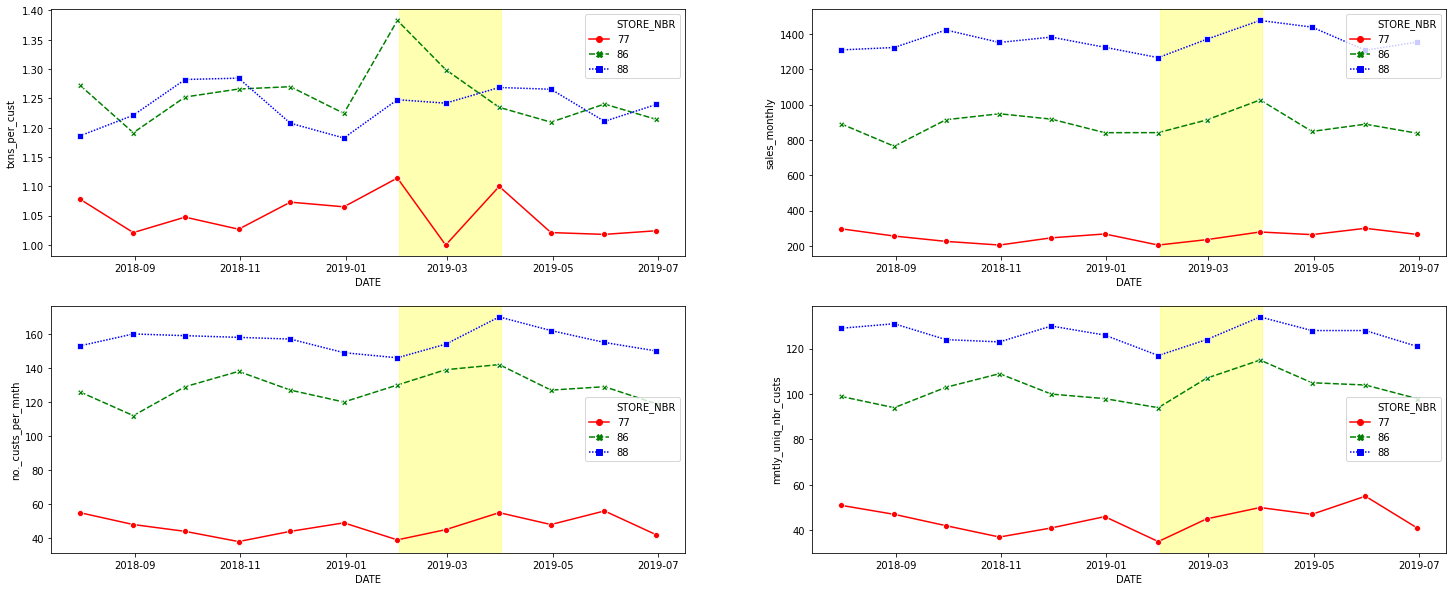

In [22]:
import seaborn as sns

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(2, 2, 1)
txns_per_cust = sns.lineplot(x = trail_metrics.index,y = 'txns_per_cust',data = trail_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette=['red','green','blue'],markers=True,ax=ax,legend='full')
txns_per_cust.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 2)
sales_monthly = sns.lineplot(x = trail_metrics.index,y = 'sales_monthly',data = trail_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette=['red','green','blue'],markers = True,ax=ax,legend='full')
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 3)
sales_monthly = sns.lineplot(x = trail_metrics.index,y = 'no._custs_per_mnth',data = trail_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette=['red','green','blue'],markers = True,ax=ax,legend='full')
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 4)
sales_monthly = sns.lineplot(x = trail_metrics.index,y = 'mntly_uniq_nbr_custs',data = trail_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette=['red','green','blue'],markers = True,ax=ax,legend='full')
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)

###### Above plots are comparision of trail store metrics 

##### YELLOW REGION depicts TRAIL PERIOD

INSIGHTS:

1.)When the new layout is adopted the total monthly sales has raisen with increase in new customers (from plot (0,1),(1,1)) 

2.)Txns per customer is not steady.

3.)The rate of change of sales and customers for New Layout is HIGH, compared to previous rate changes for all 3 Trail Stores.

RECOMMENDATIONS:

1.)Adopting New Layout for all other Stores will yield More Profits


## 4.1 TRAILSTORE 77 ANALYSIS

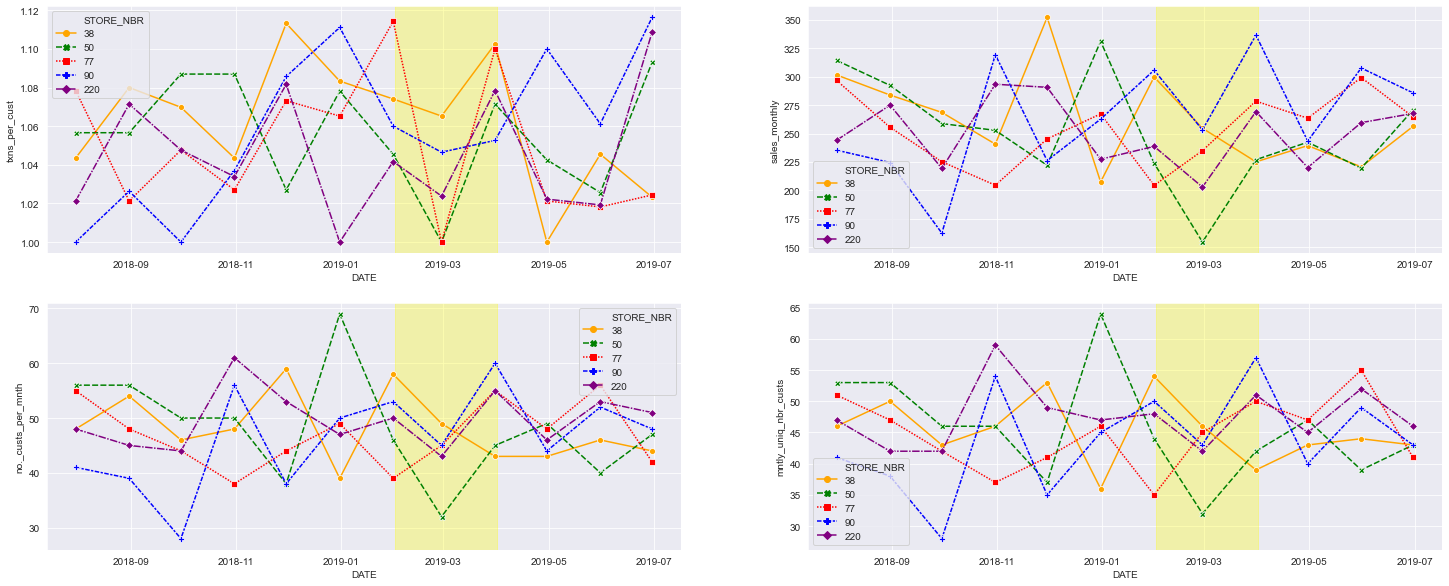

In [28]:
import seaborn as sns
custom_palette = ["orange", "green", "red", "blue", "purple"]
sns.set_palette(custom_palette)
sns.set_style("darkgrid")
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(2, 2, 1)
txns_per_cust = sns.lineplot(x = cs_77_metrics.index,y = 'txns_per_cust',data = cs_77_metrics,hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',style = 'STORE_NBR',markers=True)
txns_per_cust.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 2)
sales_monthly = sns.lineplot(x = cs_77_metrics.index,y = 'sales_monthly',data = cs_77_metrics,hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',style = 'STORE_NBR',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 3)
sales_monthly = sns.lineplot(x = cs_77_metrics.index,y = 'no._custs_per_mnth',data = cs_77_metrics,hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',style = 'STORE_NBR',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 4)
sales_monthly = sns.lineplot(x = cs_77_metrics.index,y = 'mntly_uniq_nbr_custs',data = cs_77_metrics,hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',style = 'STORE_NBR',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
plt.show()

##### Red Legends are TRAIL STORE and Other Color  Legends are DIFFERENT CONTROL STORES

###### The above plots are Comparision of Monthly Sales,Number of transcations,Number of unique customers and txns per customers of highly ranked control stores with trail store

In [24]:
cs_86

[114, 257, 223, 157, 269, 86]

1.)NORMAL PERIOD VS TRAIL PERIOD:

1a.) In Trail period,Trail store 77 monthly sales increased with Monthly Unique number of customers,number of transcations .This tells that driven force for increase in sales are increase in unique number of customers.

1b.)The New Layout attracted more people 


2.)CONTROL STORE VS TRAIL STORE:Control Store 38

Other Control Stores doesn’t have steady increase in sales.

# 4.2 TRAIL STORE 86

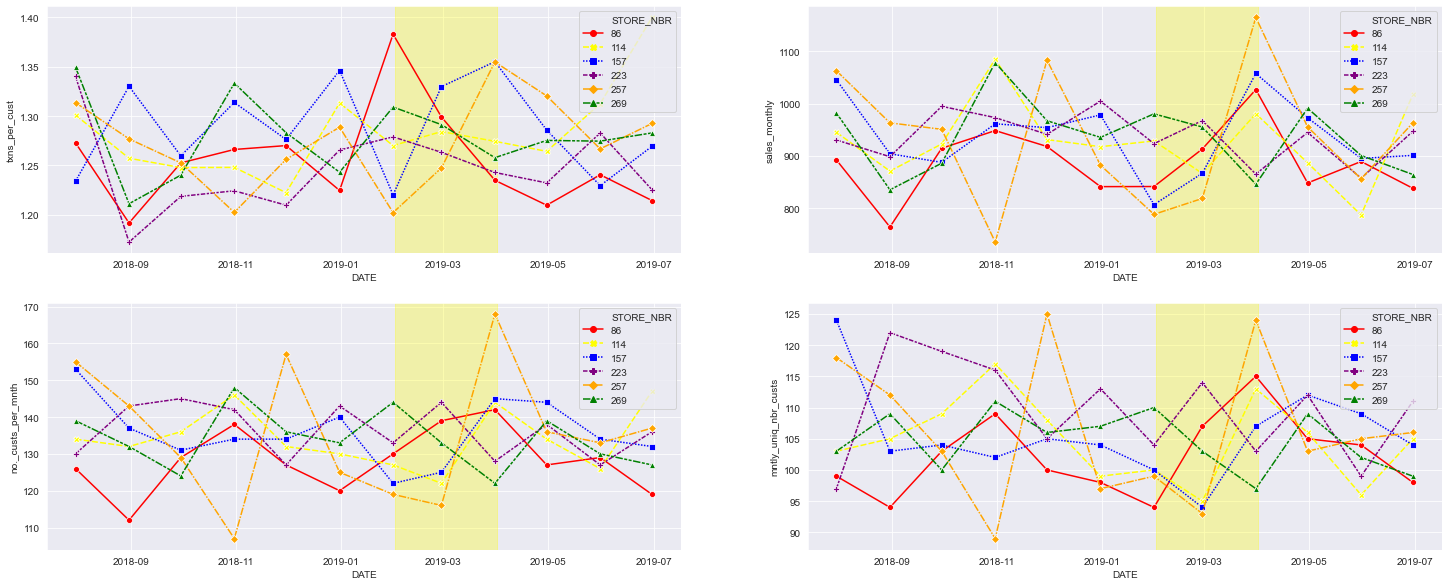

In [25]:
import seaborn as sns
custom_palette = [ "red", "yellow", "blue", "purple","orange",'green']
sns.set_palette(custom_palette)
sns.set_style("darkgrid")
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(2, 2, 1)
txns_per_cust = sns.lineplot(x = cs_86_metrics.index,y = 'txns_per_cust',data = cs_86_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
txns_per_cust.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 2)
sales_monthly = sns.lineplot(x = cs_86_metrics.index,y = 'sales_monthly',data = cs_86_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 3)
sales_monthly = sns.lineplot(x = cs_86_metrics.index,y = 'no._custs_per_mnth',data = cs_86_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 4)
sales_monthly = sns.lineplot(x = cs_86_metrics.index,y = 'mntly_uniq_nbr_custs',data = cs_86_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
plt.show()

1.)NORMAL PERIOD VS TRAIL PERIOD:

1a.) In Trail period,Trail store 88 monthly sales increased with Monthly Unique number of customers,number of transcations.

1b.) One reason with drop in transcations per customer is getting more number of unique customers to trail store.

1c.) This tells that driven force for increase in sales are increase in unique number of customers with visiting more number of times than previous ones.

The New Layout attracted more people 


2.)CONTROL STORE VS TRAIL STORE:Control Store 114

2a.) Control Store 114 metrics are decreased and then increased in trail time,the old layout didnt performed well

# 4.3 TRAIL STORE 88

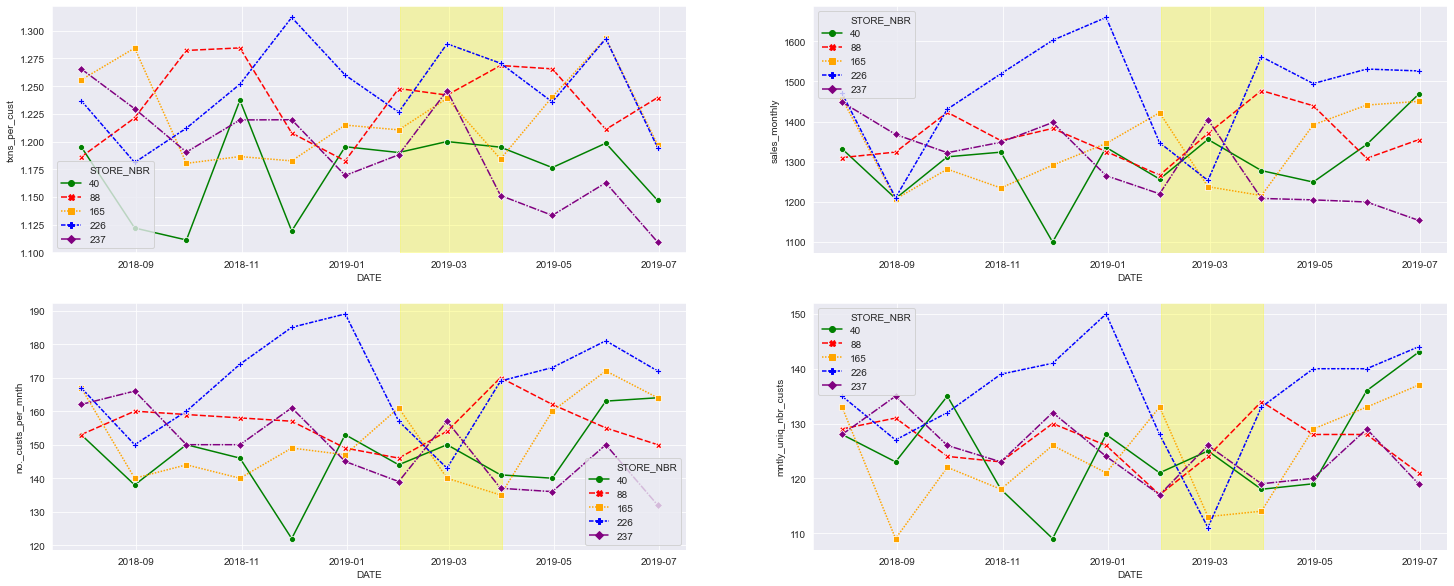

In [26]:
import seaborn as sns
custom_palette = [ "green",'red', "orange", "blue", "purple"]
sns.set_palette(custom_palette)
sns.set_style("darkgrid")
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(2, 2, 1)
txns_per_cust = sns.lineplot(x = cs_88_metrics.index,y = 'txns_per_cust',data = cs_88_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
txns_per_cust.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 2)
sales_monthly = sns.lineplot(x = cs_88_metrics.index,y = 'sales_monthly',data = cs_88_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 3)
sales_monthly = sns.lineplot(x = cs_88_metrics.index,y = 'no._custs_per_mnth',data = cs_88_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
ax = fig.add_subplot(2, 2, 4)
sales_monthly = sns.lineplot(x = cs_88_metrics.index,y = 'mntly_uniq_nbr_custs',data = cs_88_metrics,style = 'STORE_NBR',hue ='STORE_NBR',palette = custom_palette,ax=ax,legend='full',markers=True)
sales_monthly.axvspan('02-2019','04-2019', color='yellow',alpha=0.3)
plt.show()

1.)NORMAL PERIOD VS TRAIL PERIOD:

1a.)In Trail period,Trail store 88 monthly sales increased with Monthly Unique number of customers,number of transcations and slightly with transcations per customer.This tells that driven force for increase in sales are increase in unique number of customers with visiting more number of times than previous ones.

1b.)The New Layout attracted more people 


2.)CONTROL STORE VS TRAIL STORE:Control Store 40

2a.)Control Store 40 monthly sales decreases with decrease in Monthly Unique number of customers,number of transcations and transcations per customer.Looks like more sales would be posible if we adopt the trail tores new layout

RECOMMENDATIONS:

Trail Store Sales increases despite decrease in sales for Control Stores.Keeping the new layout to control stores will yeild better returns.

The Customer 

Text(0, 0.5, 'Number of Customers')

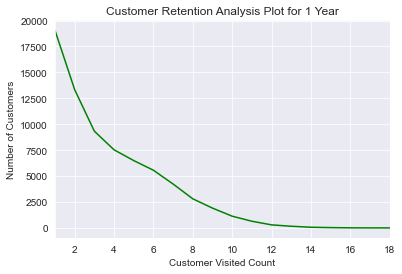

In [27]:
i = qvi_data.LYLTY_CARD_NBR.value_counts().value_counts().plot(title='Customer Retention Analysis Plot for 1 Year',color = 'green')
i.set_xlabel("Customer Visited Count")
i.set_ylabel("Number of Customers")

INSIGHTS :

1.)The above plot shows poor customer retention rate.

RECOMMENDATIONS :

1.)Encourage loyalty Program.

2.)Accept feedback

3.)Be there when things go wrong.